# Gold Price Analysis(Linear Regression)

#### The dataset used for the analysis is of gold price and the factors which have a direct or indirect influence on it such as Crude oil price, interest rate (repo rate), Indian currency price in dollars(Exchange rate), Sensex (BSE), CPI and US Dollar index. It contains 239 observations of 8 variables.To analyse our dataset, NumPy and pandaslibraries were used. Matplotlib and Seaborn were used to visualize the dataset.sklearn is used for regression analysis.
#### Aim: Predict the price of Gold based on Sensex,CrudeOil Price,Exchange Rate,Interest rate and Consumer Price Index.

### Import Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt   
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

### Read the data

In [3]:
d=pd.read_csv("C:/Users/Roopa Sara George/Downloads/Gold.csv")

### View the data

In [4]:
d

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65
1,02-10-2000,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24
2,03-10-2000,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56
3,04-10-2000,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52
4,05-10-2000,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01
...,...,...,...,...,...,...,...,...
234,23-05-2001,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57
235,24-05-2001,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34
236,25-05-2001,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39
237,26-05-2001,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35


### To check number of rows and columns

In [4]:
d.shape

(239, 8)

### To check the datatype of attributes

In [5]:
d.dtypes

Date              object
Gold_Price         int64
Crude_Oil        float64
Interest_Rate    float64
USD_INR          float64
Sensex           float64
CPI              float64
USD_Index        float64
dtype: object

### To print number of dimensions

In [6]:
d.ndim

2

### To print the index

In [7]:
d.index

RangeIndex(start=0, stop=239, step=1)

### To check the size of the data

In [8]:
d.size

1912

### Print the column names

In [9]:
d.columns

Index(['Date', 'Gold_Price', 'Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex',
       'CPI', 'USD_Index'],
      dtype='object')

### To check whether data type is empty

In [10]:
d.empty

False

### Check the duplicated value

In [11]:
d.duplicated().sum()

0

### To check there is any missing values

In [12]:
d.isnull().sum()

Date             0
Gold_Price       0
Crude_Oil        0
Interest_Rate    0
USD_INR          0
Sensex           0
CPI              0
USD_Index        0
dtype: int64

### Print the information of dataset

In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           239 non-null    object 
 1   Gold_Price     239 non-null    int64  
 2   Crude_Oil      239 non-null    float64
 3   Interest_Rate  239 non-null    float64
 4   USD_INR        239 non-null    float64
 5   Sensex         239 non-null    float64
 6   CPI            239 non-null    float64
 7   USD_Index      239 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.1+ KB


### Print Statistical information

In [14]:
d.describe()

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,19299.062762,3397.686318,6.715900,53.804819,18172.443891,73.372050,90.182510
std,11668.913490,1551.627401,1.188309,10.311144,11032.206600,29.106141,11.312607
min,4267.000000,887.420000,4.250000,39.366685,2811.600000,36.730000,71.800000
25%,6712.500000,2180.695000,6.000000,45.467395,8263.400000,45.190000,81.110000
50%,19056.000000,3303.550000,6.000000,48.664774,17464.810000,68.470000,88.940000
75%,29364.000000,4492.930000,7.000000,63.861030,26662.395000,101.370000,97.160000
max,52917.000000,6926.830000,10.250000,76.222334,41253.740000,129.300000,120.240000


### Check the relationship between data

In [15]:
d.corr()

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
Gold_Price,1.000000,0.661690,0.241996,0.855555,0.897490,0.959048,-0.132789
Crude_Oil,0.661690,1.000000,0.484567,0.348142,0.570506,0.565025,-0.589054
Interest_Rate,0.241996,0.484567,1.000000,0.222474,0.086232,0.199082,-0.025688
USD_INR,0.855555,0.348142,0.222474,1.000000,0.838075,0.928815,0.290248
Sensex,0.897490,0.570506,0.086232,0.838075,1.000000,0.960334,-0.092004
CPI,0.959048,0.565025,0.199082,0.928815,0.960334,1.000000,-0.007089
USD_Index,-0.132789,-0.589054,-0.025688,0.290248,-0.092004,-0.007089,1.000000


### To print random data

In [16]:
d.sample(3)

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
158,01-12-2013,29904,6534.28,8.75,61.863581,21170.68,91.42,80.03
142,01-08-2012,30180,5848.75,9.00,55.513323,17429.56,81.86,81.21
89,01-03-2008,12632,4109.92,6.00,40.340833,15644.44,52.41,71.80


### To print top rows

In [17]:
d.head()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


### To print bottom rows

In [18]:
d.tail(3)

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
236,01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39
237,01-07-2020,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35
238,01-08-2020,52917,3243.75,4.25,74.573820,38628.29,129.30,92.14


### To check for negative values in the dataset

In [19]:
print((d==-1).sum()[(d==-1).sum()>0])

Series([], dtype: int64)


### To find the maximum values of all variables

In [20]:
d.apply(max)

Date             01-12-2019
Gold_Price            52917
Crude_Oil           6926.83
Interest_Rate         10.25
USD_INR           76.222334
Sensex             41253.74
CPI                   129.3
USD_Index            120.24
dtype: object

### To find the minimum values of all variables

In [21]:
d.apply(min)

Date             01-01-2001
Gold_Price             4267
Crude_Oil            887.42
Interest_Rate          4.25
USD_INR           39.366685
Sensex               2811.6
CPI                   36.73
USD_Index              71.8
dtype: object

### Print unique interest rates in dataset

In [22]:
d['Interest_Rate'].unique()

array([ 8.  ,  7.5 ,  7.  ,  6.5 ,  6.25,  6.  ,  9.5 ,  9.  ,  8.75,
        8.5 ,  8.25, 10.25,  7.75,  6.75,  5.65,  5.4 ,  4.65,  4.25])

### To find the count of unique intreset rates

In [23]:
d['Interest_Rate'].value_counts()

6.00     107
9.00      22
6.50      21
6.25      18
7.00      13
6.75      12
7.75       6
8.75       6
8.25       6
8.50       5
5.40       5
8.00       4
4.25       4
9.50       3
4.65       2
10.25      2
5.65       2
7.50       1
Name: Interest_Rate, dtype: int64

### To sort values by Date

In [24]:
asc=d.sort_values(by=['Date'])
asc

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
3,01-01-2001,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52
15,01-01-2002,4693,925.63,6.50,48.271182,3311.03,38.72,120.24
27,01-01-2003,5752,1473.85,6.25,47.937694,3250.38,40.05,99.91
39,01-01-2004,6179,1425.74,6.00,45.432223,5695.67,41.79,87.20
51,01-01-2005,6149,1880.23,6.00,43.735192,6555.94,43.61,83.60
...,...,...,...,...,...,...,...,...
182,01-12-2015,25207,2435.40,7.75,66.505016,26117.54,102.90,98.63
194,01-12-2016,27754,3572.84,6.75,67.813510,26626.46,105.20,102.21
206,01-12-2017,28763,3930.99,6.25,64.209727,34056.83,109.40,92.12
218,01-12-2018,31251,3822.07,6.75,70.719639,36068.33,115.14,96.17


### To sort values by Gold Price

In [25]:
desc=d.sort_values(by=['Gold_Price'],ascending=False)
desc

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
238,01-08-2020,52917,3243.75,4.25,74.573820,38628.29,129.30,92.14
237,01-07-2020,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35
236,01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39
235,01-05-2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34
234,01-04-2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57
...,...,...,...,...,...,...,...,...
8,01-06-2001,4400,1267.73,7.00,46.972248,3456.78,37.89,119.43
9,01-07-2001,4380,1169.12,7.00,47.121652,3329.28,38.39,117.18
4,01-02-2001,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01
5,01-03-2001,4269,1166.45,7.00,46.609354,3604.38,36.90,117.37


### Lowest gold price as by August,2020

In [26]:
desc["Gold_Price"].iloc[-1]

4267

### Highest gold price as by August,2020

In [27]:
desc["Gold_Price"].iloc[0]

52917

# Data Visualization

### Scatterplot of CrudeOil Vs Gold Price

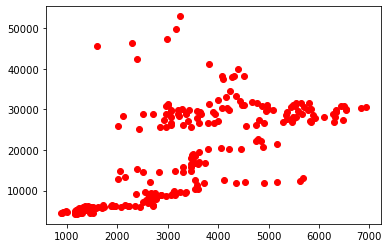

In [28]:
plt.scatter(d['Crude_Oil'],d['Gold_Price'],color='r')

### Scatterplot of InterestRate Vs Gold Price

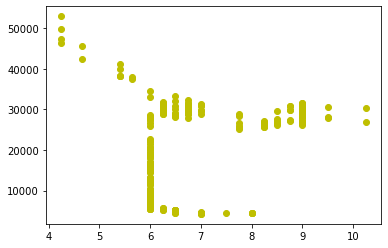

In [29]:
plt.scatter(d['Interest_Rate'],d['Gold_Price'],color='y')

### Scatterplot of Exchange Rate Vs Gold Price

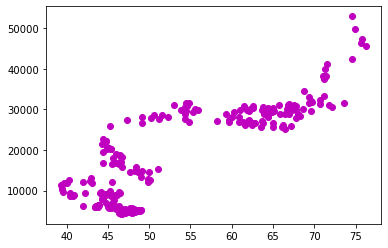

In [30]:
plt.scatter(d['USD_INR'],d['Gold_Price'],color='m')

### Scatterplot of Sensex Vs Gold Price

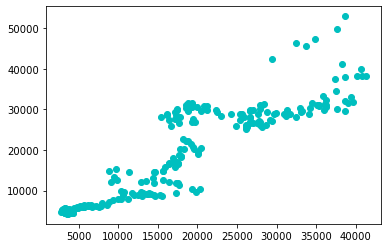

In [31]:
plt.scatter(d['Sensex'],d['Gold_Price'],color='c')

### Scatterplot of Exchange Rate Vs Gold Price

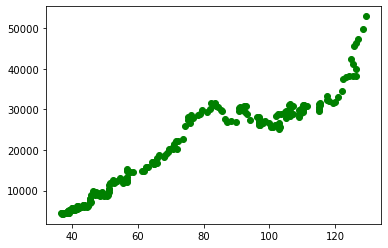

In [32]:
plt.scatter(d['CPI'],d['Gold_Price'],color='g')

###  GoldPrice

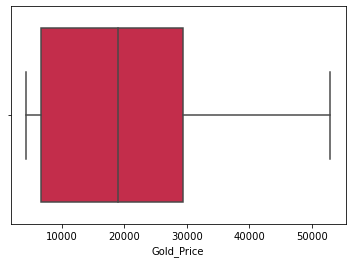

In [33]:
sns.boxplot(d['Gold_Price'],color='crimson')
plt.show()

###  Exchange Rate

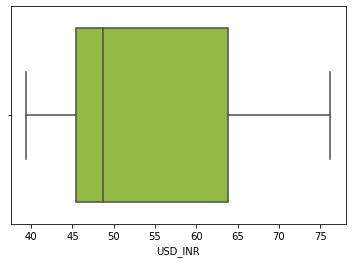

In [34]:
sns.boxplot(d['USD_INR'],color='Yellowgreen')
plt.show()

###  Sensex

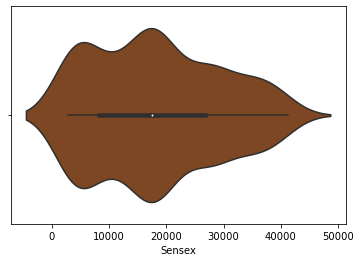

In [35]:
sns.violinplot(x=d.Sensex,color='saddlebrown')
plt.show()

### Relationship between various variables in dataset

<AxesSubplot:>

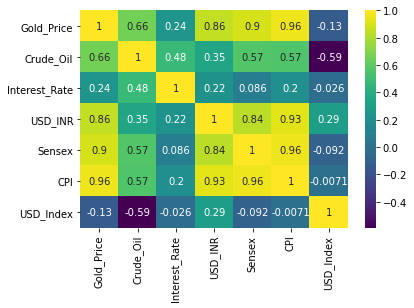

In [63]:
sns.heatmap(d.corr(),cmap='viridis',annot=True)

### Relationship between price of gold and its influencing factors

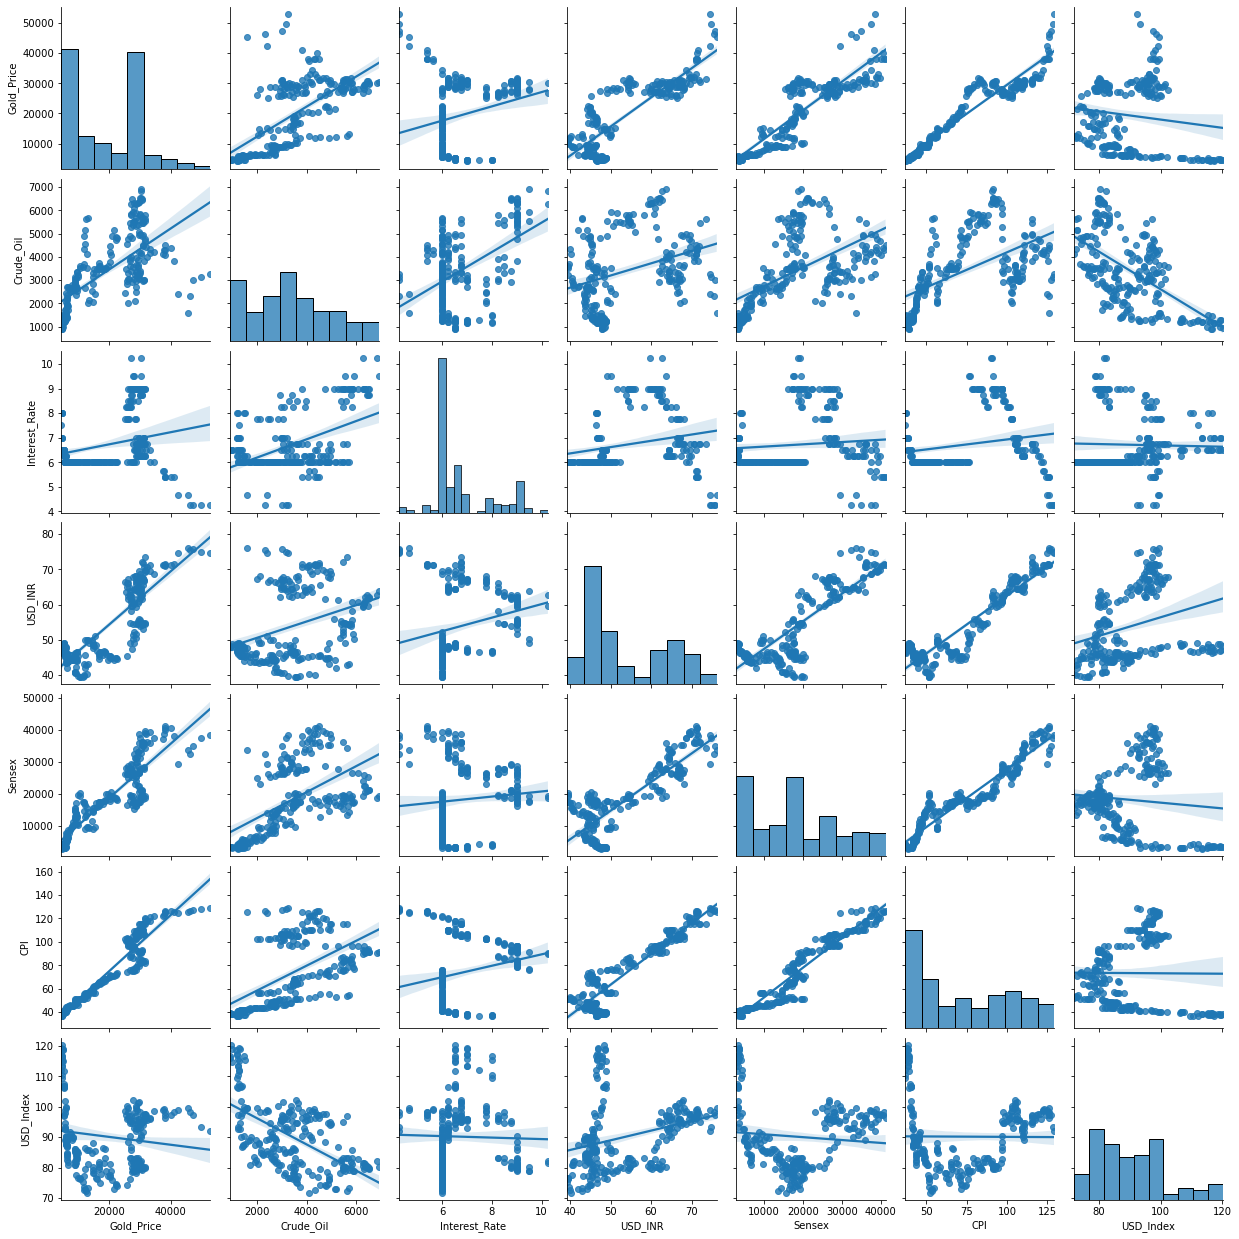

In [37]:
sns.pairplot(d,diag_kind='hist',kind='reg')
plt.show()

###  USDollar Index

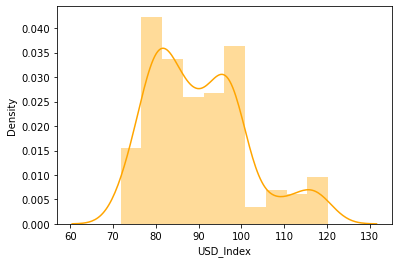

In [15]:
sns.distplot(d["USD_Index"],color='orange')
plt.show()

###  Relationship between price of gold and its influencing factors as per Interest Rate

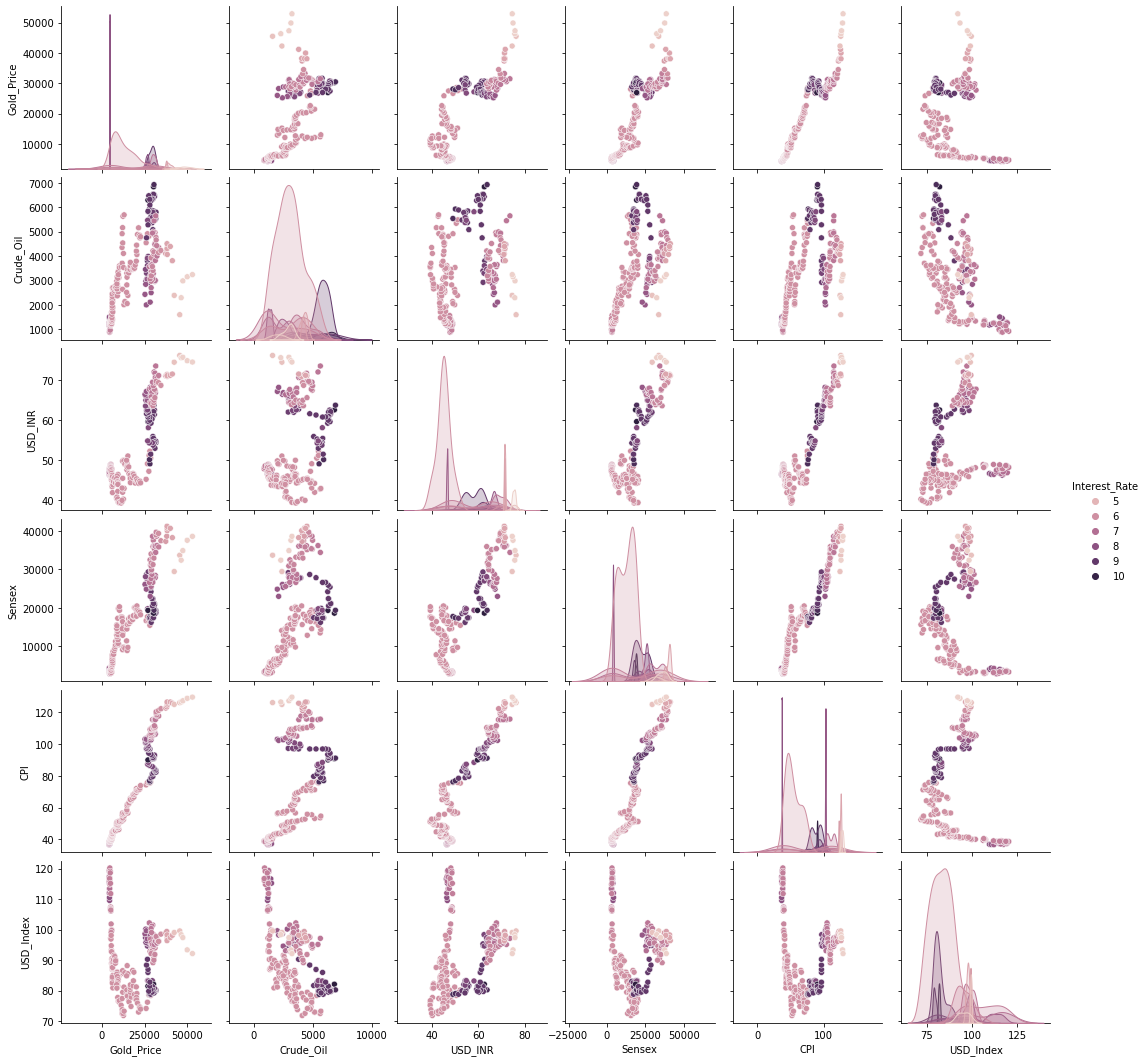

In [39]:
sns.pairplot(d,diag_kind="kde",hue='Interest_Rate')
plt.show()

###  Consumer Price Index

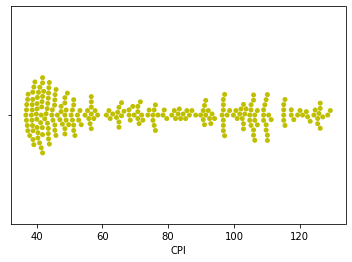

In [40]:
sns.swarmplot(d['CPI'],color='y')
plt.show()

### Price of Crude Oil 

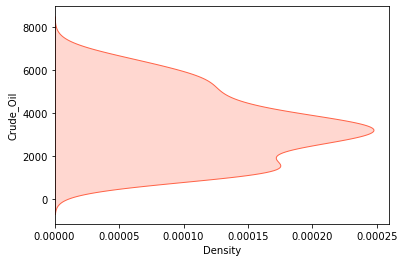

In [41]:
sns.kdeplot(d['Crude_Oil'],color='tomato',vertical=True,shade=True)
plt.show()

### Regression Plot of CrudeOil Vs GoldPrice

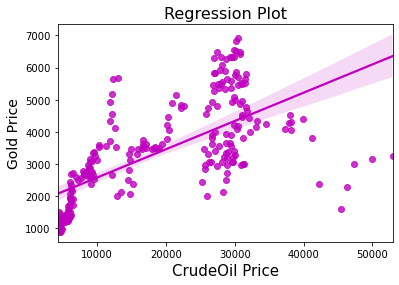

In [42]:
sns.regplot(y=d['Crude_Oil'],x=d['Gold_Price'],color='m')
plt.title('Regression Plot',size=16)
plt.ylabel('Gold Price',size=14)
plt.xlabel('CrudeOil Price',size=15)
plt.show()

### Regression Plot of InterestRate Vs GoldPrice

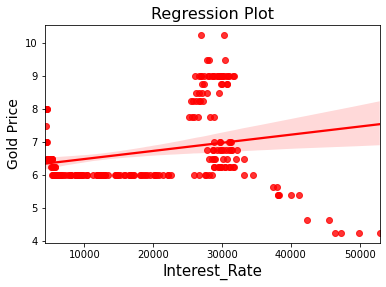

In [43]:
sns.regplot(y=d['Interest_Rate'],x=d['Gold_Price'],color='r')
plt.title('Regression Plot',size=16)
plt.ylabel('Gold Price',size=14)
plt.xlabel('Interest_Rate',size=15)
plt.show()

### Regression Plot of ExchangeRate Vs GoldPrice

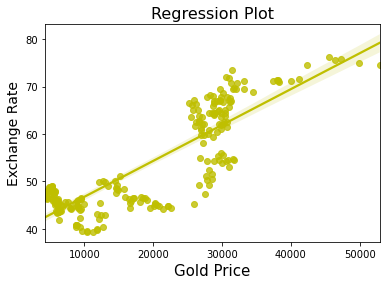

In [44]:
sns.regplot(y=d['USD_INR'],x=d['Gold_Price'],color='y')
plt.title('Regression Plot',size=16)
plt.ylabel('Exchange Rate',size=14)
plt.xlabel('Gold Price',size=15)
plt.show()

### Regression Plot of Sensex Vs GoldPrice

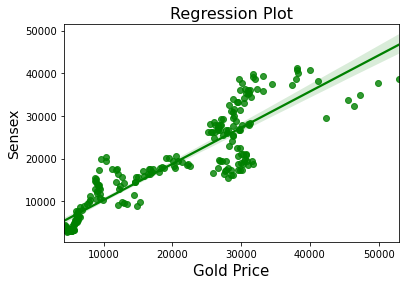

In [45]:
sns.regplot(y=d['Sensex'],x=d['Gold_Price'],color='g')
plt.title('Regression Plot',size=16)
plt.ylabel('Sensex',size=14)
plt.xlabel('Gold Price',size=15)
plt.show()

### Regression Plot of Consumer Price Index Vs GoldPrice

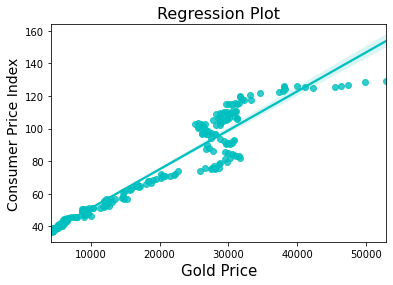

In [46]:
sns.regplot(y=d['CPI'],x=d['Gold_Price'],color='c')
plt.title('Regression Plot',size=16)
plt.ylabel('Consumer Price Index',size=14)
plt.xlabel('Gold Price',size=15)
plt.show()

## Regression Analysis

### Prepare X and Y

In [4]:
x=d.iloc[:,2:-1].values
x

array([[1.4555100e+03, 8.0000000e+00, 4.6318297e+01, 3.7110200e+03,
        3.7230000e+01],
       [1.5124700e+03, 8.0000000e+00, 4.6783613e+01, 3.9979900e+03,
        3.7310000e+01],
       [1.1781100e+03, 8.0000000e+00, 4.6745856e+01, 3.9721200e+03,
        3.6980000e+01],
       ...,
       [2.9874600e+03, 4.2500000e+00, 7.5763427e+01, 3.4915800e+04,
        1.2700000e+02],
       [3.1560100e+03, 4.2500000e+00, 7.4908993e+01, 3.7606890e+04,
        1.2853000e+02],
       [3.2437500e+03, 4.2500000e+00, 7.4573820e+01, 3.8628290e+04,
        1.2930000e+02]])

In [5]:
y=d.iloc[:,1:2].values
y

array([[ 4538],
       [ 4483],
       [ 4541],
       [ 4466],
       [ 4370],
       [ 4269],
       [ 4267],
       [ 4441],
       [ 4400],
       [ 4380],
       [ 4449],
       [ 4631],
       [ 4688],
       [ 4604],
       [ 4576],
       [ 4693],
       [ 4901],
       [ 4920],
       [ 5041],
       [ 5226],
       [ 5313],
       [ 5188],
       [ 5129],
       [ 5239],
       [ 5210],
       [ 5243],
       [ 5444],
       [ 5752],
       [ 5771],
       [ 5433],
       [ 5192],
       [ 5561],
       [ 5509],
       [ 5363],
       [ 5462],
       [ 5718],
       [ 5695],
       [ 5850],
       [ 6094],
       [ 6179],
       [ 6018],
       [ 5986],
       [ 5916],
       [ 5736],
       [ 5862],
       [ 6059],
       [ 6126],
       [ 6170],
       [ 6361],
       [ 6551],
       [ 6445],
       [ 6149],
       [ 6108],
       [ 6262],
       [ 6151],
       [ 6030],
       [ 6134],
       [ 6058],
       [ 6249],
       [ 6535],
       [ 6874],
       [ 7168],
       [

### Display the shape and first few elements of data

In [49]:
print(x[:5])

[[1455.51        8.         46.318297 3711.02       37.23    ]
 [1512.47        8.         46.783613 3997.99       37.31    ]
 [1178.11        8.         46.745856 3972.12       36.98    ]
 [1208.18        8.         46.536033 4326.72       36.9     ]
 [1267.18        7.5        46.514595 4247.04       36.73    ]]


In [50]:
print(y[:5])

[[4538]
 [4483]
 [4541]
 [4466]
 [4370]]


In [51]:
print(x.shape)

(239, 5)


In [52]:
print(y.shape)

(239, 1)


### Perform the split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

### Print the mean values

In [55]:
print(np.mean(x_train))
print(np.mean(x_test))
print(np.mean(y_train))
print(np.mean(y_test))

4348.128255278534
4311.6625333
19391.38219895288
18931.708333333332


In [7]:
l=LinearRegression()
l.fit(x_train,y_train)
print("train test complete")

train test complete


In [8]:
y_pred=l.predict(x_test)

In [10]:
d1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
d1

,Actual,Predicted
0,[42285],[39343.84685726825]
1,[29796],[30860.989395000423]
2,[11888],[10130.912658700163]
3,[12220],[15020.27939803822]
4,[30097],[32340.56810782121]
5,[4370],[2606.936867046854]
6,[13028],[15577.831695994191]
7,[5752],[5635.046940582641]
8,[26115],[26814.25424535786]
9,[47315],[37889.4512583999]


In [14]:
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

Mean Absolute Error 1893.5185951946075


### Regression Plot of Actual and Predict Profit

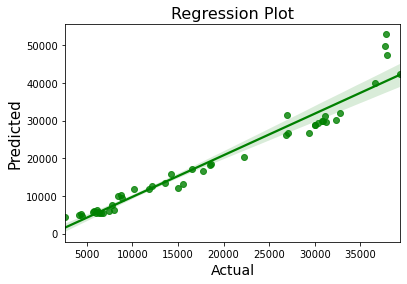

In [13]:
sns.regplot(y=y_test,x=y_pred,color='g')
plt.title('Regression Plot',size=16)
plt.xlabel('Actual',size=14)
plt.ylabel('Predicted',size=15)
plt.show()